In [114]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)

import torch
import torch.nn as nn
import torch.functional as F

In [115]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)

import torch
import torch.nn as nn
xs = [0 for i in range(hex.SIZE)]
ys = [0 for i in range(hex.SIZE)]

for _ in range(500):
    game = hex.HexGame()
            
    model = random_model.RandModel()
    tree = mcts.MCTS(game, model)
    (x, y) = tree.run(10)
    xs[x] += 1
    ys[y] += 1
print(xs)
print(ys)

[149, 180, 171]
[173, 152, 175]


In [175]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import torch
import torch.nn as nn

game = hex.HexGame()

for i in range(0, hex.SIZE-1):
    for j in range(1, 3):
        game.place_piece(i, j)   
        game.take_turn()    

print(game) 
model = random_model.RandModel()
tree = mcts.MCTS(game, model)

(x, y) = tree.run(100)
print(x, y)
game.place_piece(x, y)
print(game)
print(game.check_winner())
game.take_turn()

. x o 
 . x o 
  . . . 

2 1
. x o 
 . x o 
  . x . 

(0, [(0, 1), (1, 1), (2, 1)])


In [384]:
import importlib
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import torch
import torch.nn as nn

game = hex.HexGame()

for i in range(0, hex.SIZE-1):
    for j in range(1, 3):
        game.place_piece(j, i+j%2)   
        game.take_turn()    

print(game) 
model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
tree = mcts.MCTS(game, model)
(x, y) = tree.run(1000)
tree.visualize()
print(x, y)
game.place_piece(x, y)
print(game)
print(game.check_winner())
game.take_turn()

. . . 
 . x x 
  o o . 

2 2
. . . 
 . x x 
  o o x 

(None, [])


In [439]:
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)

SelfGame = self_play.SelfPlay(agent_)
data = SelfGame.generate_data(50, 1, shuffle=True)
print(f"len(data): {len(data)}")

100%|██████████| 50/50 [11:52<00:00, 14.25s/it]

len(data): 863


[1]/[500]: Training Loss: 4.426132603125139 - MSE Loss: 1.314951837999451 - CE Loss: 3.1111807498064907
[1]/[500]: Validation Loss: 4.790616757607873 - Val MSE Loss: 1.9082791586934038 - Val CE Loss: 2.882337596375129
[2]/[500]: Training Loss: 3.7032568888230757 - MSE Loss: 1.0403527376786779 - CE Loss: 2.6629041785543617
[2]/[500]: Validation Loss: 4.593339914531377 - Val MSE Loss: 1.7834973502486604 - Val CE Loss: 2.809842535526077
[3]/[500]: Training Loss: 3.5515829487280413 - MSE Loss: 0.9562845855961961 - CE Loss: 2.5952983661131426
[3]/[500]: Validation Loss: 4.550387757361968 - Val MSE Loss: 1.6360204845041255 - Val CE Loss: 2.914367254069775
[4]/[500]: Training Loss: 3.2913501249118284 - MSE Loss: 0.8366043760442309 - CE Loss: 2.454745751890269
[4]/[500]: Validation Loss: 4.379644212006144 - Val MSE Loss: 1.6157196743821185 - Val CE Loss: 2.7639245421900225
[5]/[500]: Training Loss: 3.467517324469306 - MSE Loss: 1.022516587409706 - CE Loss: 2.4450007406148044
[5]/[500]: Validat

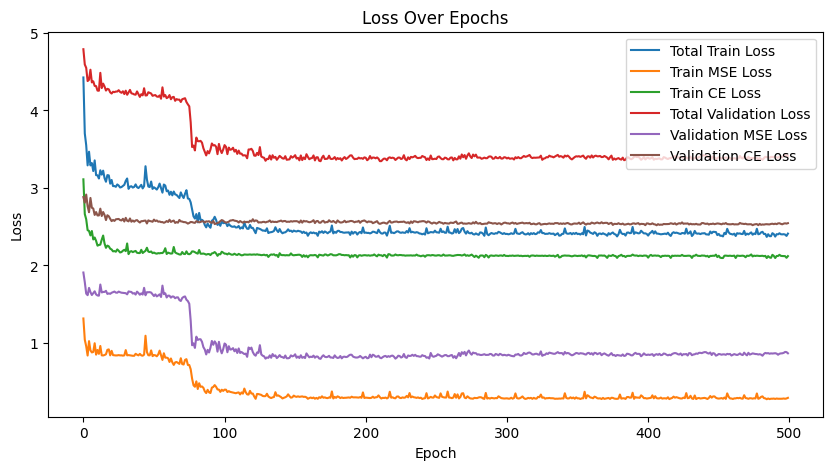

In [442]:
import random
import Game.Hex as hex
importlib.reload(hex)
import Data.preprocess_data as preprocess_data
importlib.reload(preprocess_data)
import Agent.Networks.CNN as cnn
importlib.reload(cnn)
import Agent.MCTS as mcts
importlib.reload(mcts)
import tests.RandomModel as random_model
importlib.reload(random_model)
import Agent.agent as agent
importlib.reload(agent)
import Training.SelfPlay as self_play
importlib.reload(self_play)

model = cnn.AlphaZeroNetwork(hex.SIZE, hex.SIZE)
agent_ = agent.Agent(model)
agent_.train(data, 500, 0.001, 4)

In [437]:
eval_data = random.choices(data, k=10)
model.eval()
for d in eval_data:
    print(d[-1])
    print(model(d[0].unsqueeze(dim=0), d[1].unsqueeze(dim=0))[0])
model.train();

tensor(1.)
tensor([[0.9999]], grad_fn=<TanhBackward0>)
tensor(-1.)
tensor([[1.0000]], grad_fn=<TanhBackward0>)
tensor(-1.)
tensor([[0.9998]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[0.9999]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[-1.0000]], grad_fn=<TanhBackward0>)
tensor(-1.)
tensor([[-1.0000]], grad_fn=<TanhBackward0>)
tensor(-1.)
tensor([[1.0000]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[-0.9999]], grad_fn=<TanhBackward0>)
tensor(1.)
tensor([[1.0000]], grad_fn=<TanhBackward0>)
tensor(-1.)
tensor([[-0.9871]], grad_fn=<TanhBackward0>)
